<h1>Random Forest Model for Heart Disease </h1>

<B>Import Libraries</B>

In [10]:
#import main libraies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
from sklearn.preprocessing import StandardScaler #import libraries for preprocessing dataset
from sklearn.ensemble import RandomForestClassifier # import libraries for Random Forest model
from sklearn.model_selection import train_test_split #import libraries for Create Train Test dataset
from sklearn.metrics import accuracy_score #import libraries for check Accuracy
from sklearn.metrics import confusion_matrix #import libraries for create matrix
from sklearn.metrics import classification_report #import libraries for classification

In [12]:
import eli5
from eli5.sklearn import PermutationImportance

In [13]:
import shap

In [14]:
import warnings
warnings.filterwarnings('ignore')

<B>Import CSV file</B>

In [15]:
heartData = pd.read_csv('./data/heart.csv') #import CSV file

In [16]:
heartData.describe() #describe details of dataset 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>Rename Columns</b>

In [17]:
heartData = heartData.rename(columns={"cp": "ChestPain", "trestbps": "BloodPressure", "fbs": "BloodSugar", "ca": "Vessels", "chol": "Cholesterol"})
#rename columns
#cp = chest pain
#trestbps = blood Pressure Level
#fbs = blood Sugar Level
#ca = Vessels 
#chol = Cholesterol Level

In [18]:
heartData.columns# show column names after rename

Index(['age', 'sex', 'ChestPain', 'BloodPressure', 'Cholesterol', 'BloodSugar',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'Vessels', 'thal',
       'target'],
      dtype='object')

In [19]:
heartData.describe()

,age,sex,ChestPain,BloodPressure,Cholesterol,BloodSugar,restecg,thalach,exang,oldpeak,slope,Vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>Scale features</b>

In [20]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'BloodPressure', 'Cholesterol', 'thalach', 'oldpeak']
heartData[columns_to_scale] = standardScaler.fit_transform(heartData[columns_to_scale])

<b>One-hot encode categorical features</b>

In [21]:
heartData = pd.get_dummies(heartData, columns = ['sex', 'ChestPain', 'BloodSugar', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

<b>Features and target labels to be kept separat (healthy or sick)</b>

In [22]:
labels = heartData['target']
features = heartData.drop(['target'], axis = 1)

<b>Split features and target labels into a training set and a test set</b>

In [23]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

<h1>Model Create (Random Forest)</h1>

<b>Find the optimal number of decision trees </b>

[0.7704918032786885, 0.8688524590163934, 0.8688524590163934, 0.8524590163934426, 0.8688524590163934, 0.8524590163934426, 0.8524590163934426, 0.8524590163934426]


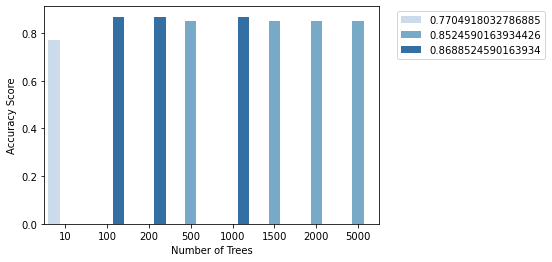

In [24]:
randomForest_scores = []
trees = [10, 100, 200, 500, 1000, 1500, 2000, 5000]
for x in trees:
    randomForest = RandomForestClassifier(n_estimators = x, random_state = 1, max_depth=1)
    randomForest.fit(features_train, labels_train)
    randomForest_scores.append(randomForest.score(features_test, labels_test))
print(randomForest_scores)

sns.barplot(trees, randomForest_scores, hue=randomForest_scores, palette='Blues')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

<b>Find the optimal max_depth</b>

[0.8688524590163934, 0.8524590163934426, 0.8360655737704918, 0.8360655737704918]


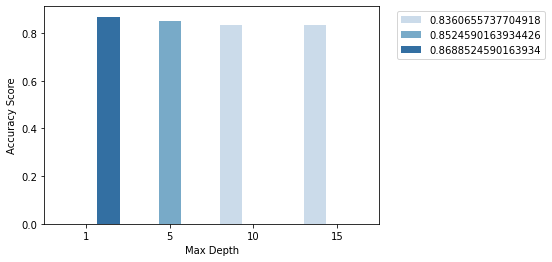

In [25]:
randomForest_scores = []
depth = [1, 5, 10, 15]
for x in depth:
    randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth= x)
    randomForest.fit(features_train, labels_train)
    randomForest_scores.append(randomForest.score(features_test, labels_test))
print(randomForest_scores)

sns.barplot(depth, randomForest_scores, hue=randomForest_scores, palette='Blues')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

<b>Instantiate model with 1000 decision trees and max depth of 1 (optimal numbers based on iterated experiments above)</b>

In [26]:
randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=1)

<b>Train the model on features and labels training data</b>

In [27]:
randomForest.fit(features_train, labels_train);

<b>Train the model on features and labels training data</b>

In [28]:
randomForest.score(features_test, labels_test)

score = round(randomForest.score(features_test,labels_test), 3) *100

print(f"Random Forest accuracy is {score}%")

Random Forest accuracy is 86.9%


<b>Feature ranking</b>

In [29]:
perm = PermutationImportance(randomForest, random_state=42).fit(features_test, labels_test)
eli5.show_weights(perm, feature_names = features_test.columns.tolist())

Weight,Feature
0.0295 ± 0.0382,Vessels
0.0164 ± 0.0207,slope_1
0.0164 ± 0.0293,thal_3
0.0164 ± 0.0415,oldpeak
0.0098 ± 0.0161,sex_1
0.0033 ± 0.0131,ChestPain_2
0.0033 ± 0.0564,thal_2
0 ± 0.0000,ChestPain_1
0 ± 0.0000,BloodPressure
0 ± 0.0000,Cholesterol


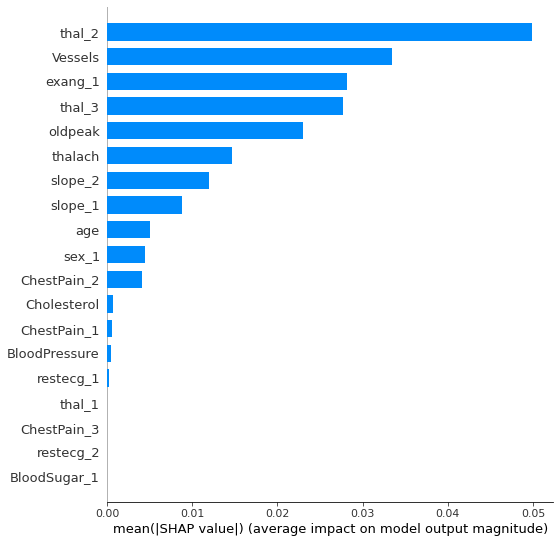

In [30]:
explainer = shap.TreeExplainer(randomForest)
shap_values = explainer.shap_values(features_test)

shap.summary_plot(shap_values[1], features_test, plot_type="bar")

<b>Confusion matrix</b>

Text(0.5, 1.0, 'Random Forest: Confusion Matrix')

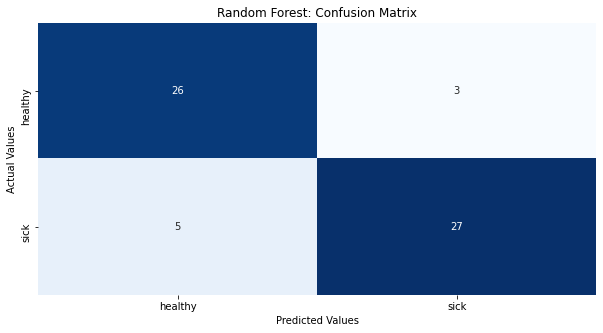

In [31]:
labels_predicted = randomForest.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest: Confusion Matrix')